# Entraînement des modèles de régression (LinearRegression et RandomForestRegressor)

## Tables des matières

### 1. Import des librairies
Import des bibliothèques nécessaires pour la modélisation, l'évaluation et la sauvegarde du modèle

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt

### 2. Chargement des données
Chargement du dataset synthétique généré précédemment

In [2]:
df = pd.read_csv("../data/dataset_synthetique_calories.csv")
df.head()

,poids_kg,duree_min,vitesse_moyenne,distance_km,intensite,age,fc_max,fc_moyenne,calories_brulees
0,79.967142,126.887586,20.200860,42.720639,endurance,24,196,135.273769,1546.232855
1,73.617357,115.616746,29.875255,57.567997,cool,30,190,112.595584,1012.082708
2,81.476885,83.414509,27.351612,38.025354,rythme,25,195,137.876322,1059.216261
3,90.230299,177.977287,15.720811,46.632455,endurance,39,181,119.857877,1970.576011
4,72.658466,120.866223,30.483767,61.407630,endurance,57,163,114.115911,1237.556632


### 3. Préparation des features et de la cible
Définition des variables explicatives (features) et de la varaible cible (calories brûlées)

In [3]:
X = df[['poids_kg', 'duree_min', 'vitesse_moyenne', 'distance_km', 'fc_moyenne']]
y = df['calories_brulees']

### 4. Séparation des données en train/test
Division du dataset en ensemble d'entraînement et de test (80% / 20%)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Modèle de régression linéaire

#### 5.1.1. Entraînement d'un modèle de régression linéaire simple

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_lr = lr.predict(X_test)

#### 5.1.2. Évaluation du modèle linéaire
Calcul des métriques d'erreur du modèle linéaire

In [6]:
print("Linear Regression - MAE : ", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression - RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression - MAE :  153.5585465116862
Linear Regression - RMSE :  191.98006969906444


#### 5.2.1. Modèle Random Forest
Entraînement d'un modèle de forêt aléatoire (plus performant sur données non linéaires)

In [7]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_rf = rf.predict(X_test)

#### 5.2.2. Évaluation du modèle Random Forest
Évaluation des performances de la forêt aléatoire

In [8]:
print("Random Forest - MAE : ", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest - RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest - MAE :  75.93681395049575
Random Forest - RMSE :  100.18649897310694


In [9]:
y_train_pred = rf.predict(X_train)
print("Train MAE :", mean_absolute_error(y_train, y_train_pred))
print("Test MAE  :", mean_absolute_error(y_test, y_pred_rf))

Train MAE : 31.019807205765357
Test MAE  : 75.93681395049575


Les erreurs sont divisé par 2 avec la Random Forest.

### 6. Visualisation des prédictions vs réel
Visualisation de la corrélation enntre les valeurs prédictes et réelles

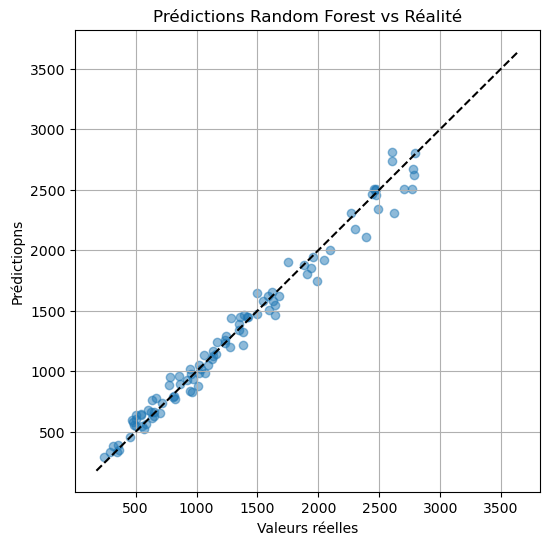

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictiopns")
plt.title("Prédictions Random Forest vs Réalité")
plt.grid(True)
plt.show()

- **La courbe scatter** montre que les points sont bien alignés sur la diagonale -> le modèle **généralise bien**, sans oberfit apparent.
- Il y a une légère dispersion au-delà de 2200 kcal, **ce qui est normal** : les très longues sorties sont plus rares.

### 7. Sauvegarde du modèle entraîné
Sauvegarde du modèle entraîné pour un futur usage dans une app web

In [11]:
joblib.dump(rf, "../app/model_calories.pkl") 

['../app/model_calories.pkl']